<a href="https://colab.research.google.com/github/Alex-Jung-HB/0804_python_Kalman-Filter/blob/main/0804_python_Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 1: 1D 칼만필터로 노이즈 위치 데이터 보정하기

In [10]:
# Day 1 Lab: 칼만필터와 데이터 추적기법 (Kalman Filter and Data Tracking)
# ====================================================================
# 이 노트북은 자율주행 데이터 처리 강의의 첫 번째 실습입니다.
# 각 실습은 Python 표준 라이브러리, NumPy, matplotlib만 사용하며,
# 센서 데이터의 노이즈 보정과 융합을 다룹니다.
# ====================================================================

# ================================================================
# Lab 1: 1D 칼만필터로 노이즈 위치 데이터 보정하기
# ================================================================
"""
목표:
- 노이즈가 섞인 1차원 위치 데이터를 Kalman Filter로 보정합니다.
- Python 표준 라이브러리만 사용합니다.

칼만 필터 핵심 개념:
1. 예측(Prediction): 이전 상태를 바탕으로 현재 상태 예측
2. 갱신(Update): 측정값을 받아 예측을 보정
3. 칼만 게인(Kalman Gain): 예측과 측정 중 어느 것을 더 믿을지 결정
"""

print("="*70)
print("Lab 1: 1D 칼만필터로 노이즈 위치 데이터 보정하기")
print("="*70)

# 1D 칼만필터 예제 (Python 표준 라이브러리)
import random

# Step 1: 노이즈가 있는 위치 데이터 생성
# ------------------------------------------------
print("\n[Step 1] 노이즈 데이터 생성")
print("-" * 30)

true_position = 0  # 실제 위치 (우리가 추정하려는 진실값)
print(f"실제 위치 (진실값): {true_position}")

# random.gauss(평균, 표준편차)를 사용해 가우시안 노이즈 생성
# 실제 위치 0에 평균 0, 표준편차 1인 노이즈를 더해 10개의 측정값 생성
measured_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
print(f"노이즈가 포함된 측정 위치 (10개): {[round(x, 3) for x in measured_positions]}")

# Step 2: 칼만필터 초기값 설정
# ------------------------------
print("\n[Step 2] 칼만필터 초기값 설정")
print("-" * 35)

# estimate: 현재 위치에 대한 추정값 (초기값은 보통 0 또는 첫 번째 측정값 사용)
estimate = 0
print(f"초기 추정값: {estimate}")

# estimate_error: 추정값의 불확실성 (공분산). 클수록 추정이 불확실함
estimate_error = 1
print(f"초기 추정 오차 (불확실성): {estimate_error}")

# measurement_error: 측정값의 불확실성. 센서 특성에 따라 결정
measurement_error = 1
print(f"측정 오차 (센서 노이즈): {measurement_error}")

# Step 3: 예측-갱신 반복 (칼만필터의 핵심!)
# -------------------------------------------
print("\n[Step 3] 칼만필터 예측-갱신 과정")
print("-" * 40)
print("단계별 추정값 변화:")
print("측정값 -> 칼만게인 -> 새로운추정값 -> 새로운오차")

for i, z in enumerate(measured_positions):
    # 저장용 (출력을 위해)
    old_estimate = estimate
    old_error = estimate_error

    # 칼만 게인 계산 (Kalman Gain)
    # K = P / (P + R)
    # P: 추정 오차, R: 측정 오차
    # 칼만 게인이 클수록 측정값을 더 신뢰, 작을수록 예측값을 더 신뢰
    kalman_gain = estimate_error / (estimate_error + measurement_error)

    # 추정값 업데이트 (Innovation)
    # 새로운 추정값 = 이전 추정값 + K × (측정값 - 이전 추정값)
    # (측정값 - 이전 추정값)을 'innovation' 또는 'residual'이라고 함
    innovation = z - estimate  # 측정값과 예측값의 차이
    estimate = estimate + kalman_gain * innovation

    # 추정 오차 업데이트 (Covariance Update)
    # 새로운 오차 = (1 - K) × 이전 오차
    # 칼만 게인이 클수록 오차가 더 많이 줄어듦
    estimate_error = (1 - kalman_gain) * estimate_error

    # 각 단계별 결과 출력 (처음 3개와 마지막만 출력)
    if i < 3 or i == len(measured_positions) - 1:
        print(f"[{i+1:2d}] {z:6.3f} -> K={kalman_gain:.3f} -> {estimate:6.3f} -> err={estimate_error:.3f}")

print(f"\n최종 추정값: {estimate:.6f}")
print(f"실제값과의 오차: {abs(estimate - true_position):.6f}")

Lab 1: 1D 칼만필터로 노이즈 위치 데이터 보정하기

[Step 1] 노이즈 데이터 생성
------------------------------
실제 위치 (진실값): 0
노이즈가 포함된 측정 위치 (10개): [1.222, 0.695, 1.308, -1.721, 0.198, 0.459, -0.842, 0.363, -2.122, -0.258]

[Step 2] 칼만필터 초기값 설정
-----------------------------------
초기 추정값: 0
초기 추정 오차 (불확실성): 1
측정 오차 (센서 노이즈): 1

[Step 3] 칼만필터 예측-갱신 과정
----------------------------------------
단계별 추정값 변화:
측정값 -> 칼만게인 -> 새로운추정값 -> 새로운오차
[ 1]  1.222 -> K=0.500 ->  0.611 -> err=0.500
[ 2]  0.695 -> K=0.333 ->  0.639 -> err=0.333
[ 3]  1.308 -> K=0.250 ->  0.806 -> err=0.250
[10] -0.258 -> K=0.091 -> -0.064 -> err=0.091

최종 추정값: -0.063558
실제값과의 오차: 0.063558


 Lab 2: 센서 융합 (GPS + IMU) 가중 평균 실습

/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4160599759.py:127: UserWarning: Glyph 49468 (\N{HANGUL SYLLABLE SEN}) missing from font(s) DejaVu Sans.
  plt.tight_layo



Lab 2: 센서 융합 (GPS + IMU) 가중 평균 실습

[Step 1] GPS와 IMU 센서 데이터 생성
----------------------------------------
실제 위치: 0
GPS 측정값 (정확, σ=1): [-0.514, 0.609, 0.23, 2.155, -0.496, 0.623, 0.564, 0.123, 0.003, -0.948]
IMU 측정값 (부정확, σ=2): [-2.319, -1.563, 1.359, -1.429, 2.532, 0.686, -2.198, 2.601, 0.632, -0.546]

[Step 2] 센서 신뢰도 설정
------------------------------
GPS 가중치: 0.6 (더 정확한 센서)
IMU 가중치: 0.4 (덜 정확한 센서)
가중치 합: 1.0 (반드시 1이어야 함)

[Step 3] 가중 평균으로 센서 데이터 융합
---------------------------------------------
융합 과정 예시 (처음 3개):
[1] GPS:-0.514 × 0.6 + IMU:-2.319 × 0.4 = -1.236
[2] GPS: 0.609 × 0.6 + IMU:-1.563 × 0.4 = -0.260
[3] GPS: 0.230 × 0.6 + IMU: 1.359 × 0.4 =  0.682

GPS 측정값: [-0.514, 0.609, 0.23, 2.155, -0.496, 0.623, 0.564, 0.123, 0.003, -0.948]
IMU 측정값: [-2.319, -1.563, 1.359, -1.429, 2.532, 0.686, -2.198, 2.601, 0.632, -0.546]
융합 결과:   [-1.236, -0.26, 0.682, 0.721, 0.715, 0.648, -0.541, 1.114, 0.255, -0.787]


Lab 2 확장: 센서 융합 결과 시각화

[시각화용 데이터 생성]
그래프 생성 중...
그래프가 표시됩니다.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49468 (\N{HANGUL SYLLABLE SEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50997 (\N{HANGUL SYLLABLE YUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

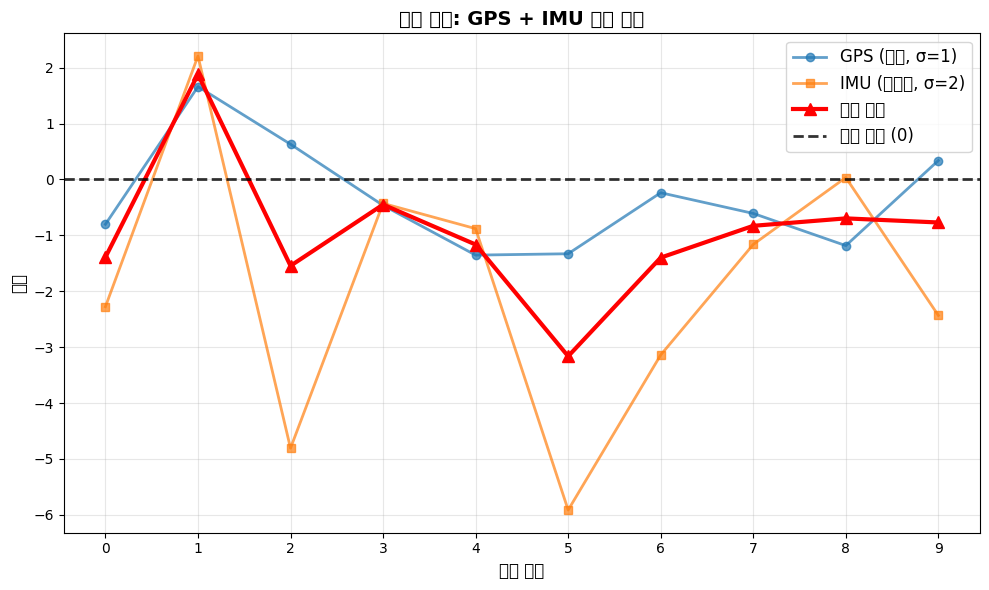


[성능 비교 - 평균제곱오차(MSE)]
GPS MSE:  0.9551
IMU MSE:  8.6202
융합 MSE: 2.3131
융합으로 인한 개선: -142.2%


In [8]:
# ================================================================
# Lab 2: 센서 융합 (GPS + IMU) 가중 평균 실습
# ================================================================
"""
목표:
- GPS와 IMU(관성측정장치) 데이터를 가중 평균으로 융합합니다.
- 두 센서의 신뢰도가 다를 때 어떻게 데이터를 결합하는지 학습합니다.

센서 융합의 필요성:
- GPS: 정확하지만 실내에서 신호 약함, 업데이트 느림
- IMU: 빠르지만 드리프트 발생, 누적 오차
- 융합: 각 센서의 장점을 살리고 단점을 보완
"""

print("\n\n" + "="*70)
print("Lab 2: 센서 융합 (GPS + IMU) 가중 평균 실습")
print("="*70)

# 센서 융합 (GPS + IMU) 가중 평균 예제
import random

# Step 1: GPS, IMU 위치 데이터 생성
# ----------------------------------
print("\n[Step 1] GPS와 IMU 센서 데이터 생성")
print("-" * 40)

true_position = 0  # 실제 위치
print(f"실제 위치: {true_position}")

# GPS 데이터: 비교적 정확 (표준편차 1)
# random.gauss(0, 1): 랜덤 오차 생성(평균, 표준편차). 원인: 대기간섭, 건물반사, 위상신호약화, 계산오차
# _: under score. 순서와 관계없이 몇 회 처리
gps_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
print(f"GPS 측정값 (정확, σ=1): {[round(x, 3) for x in gps_positions]}")    # round(숫자, 소수점자리수)

# IMU 데이터: 상대적으로 부정확 (표준편차 2)
imu_positions = [true_position + random.gauss(0, 2) for _ in range(10)]
print(f"IMU 측정값 (부정확, σ=2): {[round(x, 3) for x in imu_positions]}")

# Step 2: 신뢰도(가중치) 설정
# ----------------------------
print("\n[Step 2] 센서 신뢰도 설정")    # \n: 줄바꿈
print("-" * 30)

# 가중치는 센서의 정확도에 반비례하여 설정
# GPS가 더 정확하므로 더 높은 가중치 부여
w_gps = 0.6  # GPS 가중치
w_imu = 0.4  # IMU 가중치

print(f"GPS 가중치: {w_gps} (더 정확한 센서)")
print(f"IMU 가중치: {w_imu} (덜 정확한 센서)")
print(f"가중치 합: {w_gps + w_imu} (반드시 1이어야 함)")

# Step 3: 가중 평균 융합
# ----------------------
print("\n[Step 3] 가중 평균으로 센서 데이터 융합")
print("-" * 45)

# 가중 평균 공식: 융합값 = w1 × 값1 + w2 × 값2 (가중치가 반영된 GPS와 IMU 예측값을 가중 평균)
# zip() 함수로 GPS와 IMU 데이터를 쌍으로 묶어 처리. 출력 시, GPS: 1.0, IMU: 0.8.....
fused_positions = [w_gps * gps + w_imu * imu for gps, imu in zip(gps_positions, imu_positions)]

print("융합 과정 예시 (처음 3개):")
for i in range(3):
    gps_val = gps_positions[i]
    imu_val = imu_positions[i]
    fused_val = fused_positions[i]
    print(f"[{i+1}] GPS:{gps_val:6.3f} × {w_gps} + IMU:{imu_val:6.3f} × {w_imu} = {fused_val:6.3f}")    # 6.3f: 전체너비(글자공간):6, 소숫점 이하:3, f: string format=float(실수)

print(f"\nGPS 측정값: {[round(x, 3) for x in gps_positions]}")
print(f"IMU 측정값: {[round(x, 3) for x in imu_positions]}")
print(f"융합 결과:   {[round(x, 3) for x in fused_positions]}")

# ================================================================
# Lab 2-1 시각화 버전
# ================================================================
"""
시각화를 통해 센서 융합 효과를 직관적으로 확인합니다.
"""

print("\n\n" + "="*70)
print("Lab 2 확장: 센서 융합 결과 시각화")
print("="*70)

# 센서 융합 (GPS + IMU) 가중 평균 예제 - 시각화 포함
import random
import matplotlib.pyplot as plt

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = ['Arial', 'DejaVu Sans']    # plt.rcParams = matplotlib.pyplot.runtime_configuration_parameters

# Step 1: 새로운 데이터셋 생성 (시각화용)
print("\n[시각화용 데이터 생성]")
true_position = 0
gps_positions = [true_position + random.gauss(0, 1) for _ in range(10)]
imu_positions = [true_position + random.gauss(0, 2) for _ in range(10)]

# Step 2: 신뢰도(가중치) 설정
w_gps = 0.6
w_imu = 0.4

# Step 3: 가중 평균 융합
fused_positions = [w_gps * gps + w_imu * imu for gps, imu in zip(gps_positions, imu_positions)]

# Step 4: 시각화
print("그래프 생성 중...")
plt.figure(figsize=(10, 6))

# 각 센서 데이터를 다른 스타일로 플롯
plt.plot(gps_positions, 'o-', label='GPS (정확, σ=1)', alpha=0.7, linewidth=2, markersize=6)    # o-: o: 점 마커, -: 선으로 연결(line type)
plt.plot(imu_positions, 's-', label='IMU (부정확, σ=2)', alpha=0.7, linewidth=2, markersize=6)
plt.plot(fused_positions, '^-', label='융합 결과', linewidth=3, markersize=8, color='red')

# 실제 위치를 점선으로 표시
plt.axhline(y=true_position, color='black', linestyle='--', linewidth=2,    #  axhline = Axis Horizontal Line, alpha: transparency
           label=f'실제 위치 ({true_position})', alpha=0.8)

# 그래프 꾸미기
plt.legend(fontsize=12)
plt.title('센서 융합: GPS + IMU 가중 평균', fontsize=14, fontweight='bold')
plt.xlabel('시간 단계', fontsize=12)
plt.ylabel('위치', fontsize=12)
plt.grid(True, alpha=0.3)

# x축과 y축 눈금 설정: plt.xticks(range(10)): X축 눈금 설정(적용안해면 자동설), tight_layout(): 제목 완전히 보임, 모든 라벨 보임, 요소들이 깔끔하게 배치
plt.xticks(range(10))
plt.tight_layout()

print("그래프가 표시됩니다.")
plt.show()

# 성능 비교
# MSE(Mean Squared Error) 과정: 모든 예측값 제곱(양수로 전환) >> 모두 합산 >> 전체 갯수로 나눔 >> 작을수록 우수!!
# MSE: 머신러닝, 센서융합, 표준화 등에서 오차가 중용해서 강조하고자 할 때 사용
gps_mse = sum([(pos - true_position)**2 for pos in gps_positions]) / len(gps_positions)
imu_mse = sum([(pos - true_position)**2 for pos in imu_positions]) / len(imu_positions)
fused_mse = sum([(pos - true_position)**2 for pos in fused_positions]) / len(fused_positions)

print(f"\n[성능 비교 - 평균제곱오차(MSE)]")
print(f"GPS MSE:  {gps_mse:.4f}")
print(f"IMU MSE:  {imu_mse:.4f}")
print(f"융합 MSE: {fused_mse:.4f}")
print(f"융합으로 인한 개선: {((min(gps_mse, imu_mse) - fused_mse) / min(gps_mse, imu_mse) * 100):.1f}%")


Lab 3: CSV 데이터에 칼만필터 적용 및 시각화

/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4281818418.py:134: UserWarning: Glyph 52860 (\N{HANGUL SYLLABLE KAL}) missing from font(s) DejaVu Sans.
  plt.tight_layo



Lab 3: CSV 데이터에 칼만필터 적용 및 시각화

[Step 1] 데이터 로딩
-------------------------
⚠️  CSV 파일을 찾을 수 없어 랜덤 데이터를 생성합니다.
   오류: FileNotFoundError
데이터 포인트 수: 20
첫 5개 측정값: [0.902, -0.869, 0.256, -1.626, 0.646]

[Step 2] 칼만필터 적용
------------------------------
초기 추정값: 0.902
추정 오차: 1.0
측정 오차: 1.0

칼만 필터링 진행 중...
[ 1] 측정: 0.902 | 게인:0.500 | 추정: 0.902
[ 2] 측정:-0.869 | 게인:0.333 | 추정: 0.312
[ 3] 측정: 0.256 | 게인:0.250 | 추정: 0.298
[20] 측정: 2.687 | 게인:0.048 | 추정: 0.997
칼만 필터링 완료! 총 20개 포인트 처리

[Step 3] 결과 시각화
-------------------------
그래프가 표시됩니다.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52860 (\N{HANGUL SYLLABLE KAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54596 (\N{HANGUL SYLLABLE PIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

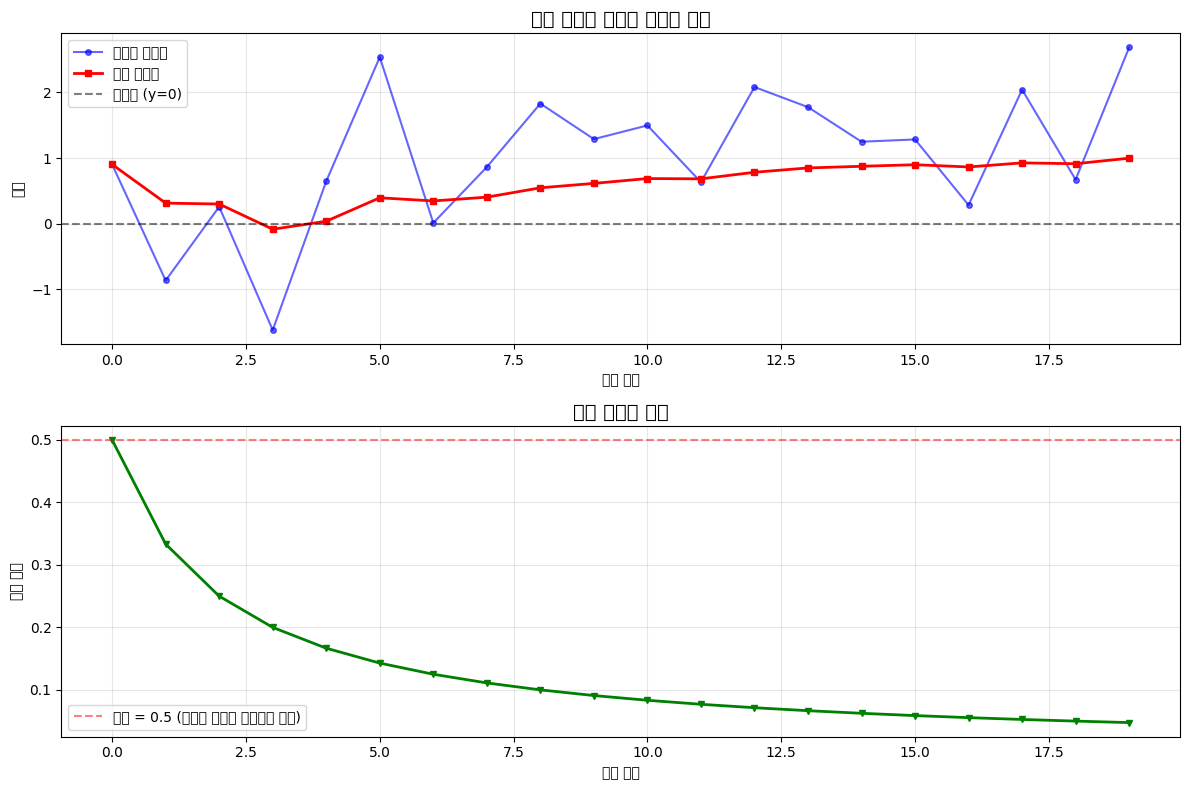


[Step 4] 성능 분석
-------------------------
📊 정량적 성능 지표:
----------------------------------------
📈 평균제곱오차 (MSE)
   원본 데이터:     2.1080
   필터링 후:       0.4692
   개선율:          77.74%

📊 표준편차 (데이터 산포)
   원본 데이터:     1.0507
   필터링 후:       0.3089
   변동성 감소:     70.60%

📍 평균값
   원본 데이터:     1.0020
   필터링 후:       0.6114

🎯 칼만 게인 분석
   평균 칼만 게인:  0.132
   → 예측값을 더 신뢰하는 경향


🎓 오늘의 실습 정리

✅ 완료된 실습 항목:
   1️⃣  1D 칼만필터로 노이즈 위치 데이터 보정
   2️⃣  센서 융합 (GPS + IMU) 가중 평균
   3️⃣  데이터 시각화 및 성능 분석

🧠 학습한 핵심 개념:
   • 칼만 게인의 의미와 계산
   • 예측-갱신 사이클
   • 센서 융합의 가중 평균
   • 불확실성과 신뢰도의 관계
   • 성능 지표 (MSE, 표준편차)

🔍 칼만 필터의 핵심 통찰:
   • 게인이 클수록 측정값을 더 신뢰
   • 게인이 작을수록 예측값을 더 신뢰
   • 반복할수록 추정 오차가 감소
   • 센서 융합으로 단일 센서보다 우수한 성능

📊 제출 자료:
   • Colab에서 결과(플롯, 수치)를 저장해 제출하세요
   • 그래프 이미지와 성능 지표를 포함하세요

❓ 추가 질문이나 도움이 필요하면:
   • 강의 포럼에 질문 게시
   • 이메일로 문의
   • 실습 코드를 수정해보며 실험

🚀 다음 실습 미리보기:
   • 2D 칼만 필터 (위치 + 속도)
   • 확장 칼만 필터 (비선형 시스템)
   • 실제 센서 데이터 처리

실습 완료! 수고하셨습니다! 🎉


In [9]:
# ================================================================
# Lab 3: CSV 데이터에 칼만필터 적용 및 시각화
# ================================================================
"""
목표:
- 실제 데이터셋에 칼만 필터를 적용합니다.
- 필터링 전후의 차이를 시각화하고 성능을 정량적으로 분석합니다.

칼만 필터의 실제 적용:
1. 센서 데이터 수집
2. 시스템 모델 설정
3. 노이즈 모델 추정
4. 필터링 적용
5. 결과 검증
"""

print("\n\n" + "="*70)
print("Lab 3: CSV 데이터에 칼만필터 적용 및 시각화")
print("="*70)

# 칼만필터로 CSV(또는 생성) 데이터 보정 및 시각화: CSV: Comma Separated Values(쉼표로 구분된 간단한 표 형태의 데이터 파일)
import random
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 데이터 불러오기 또는 생성
# ---------------------------------
print("\n[Step 1] 데이터 로딩")
print("-" * 25)

try:
    # pandas를 사용해 CSV 파일 읽기 시도
    import pandas as pd
    data = pd.read_csv('positions.csv')   # pandas로 csv 파일 읽어 표 형식으로 작성
    measured_positions = data['position'].tolist()    # data['position']: 표 형식의 데이터 중 position 부분만 발췌. tolist(): pandas Series → Python 리스트
    print("✅ CSV 파일에서 데이터를 성공적으로 불러왔습니다.")
    print(f"   파일명: positions.csv")
    print(f"   데이터 포인트 수: {len(measured_positions)}")
except Exception as e:
    # CSV 파일이 없으면 랜덤 데이터 생성
    print("⚠️  CSV 파일을 찾을 수 없어 랜덤 데이터를 생성합니다.")
    print(f"   오류: {type(e).__name__}")

    # 더 현실적인 데이터 생성 (트렌드 + 노이즈)
    num_points = 20
    measured_positions = []

    for i in range(num_points):
        # 약간의 트렌드와 랜덤 워크 추가
        trend = 0.1 * i  # 선형 트렌드. 시간이 지날수록 점점 커지는 경향(단편적인 자동차 이동, 드론상승 등)
        noise = random.gauss(0, 1)  # 가우시안 노이즈(선형적인 값이 오차적용). GPS: 대기 간섭, 건물 반사, IMU: 전자 노이즈, 진동, 카메라: 픽셀 노이즈, 조명 변화
        random_walk = random.gauss(0, 0.5) if i > 0 else 0  # 랜덤 워크: 첫 번째는 오차가 0이고, 이후에는 표준오차 0.5 이내에서 오차발생

        position = trend + noise + random_walk    # 이전 오차가 계속 누적
        measured_positions.append(position)

print(f"데이터 포인트 수: {len(measured_positions)}")
print(f"첫 5개 측정값: {[round(x, 3) for x in measured_positions[:5]]}")

# Step 2: 칼만필터 적용
# ---------------------
print("\n[Step 2] 칼만필터 적용")
print("-" * 30)

# 초기 설정
estimate = measured_positions[0]  # 첫 번째 측정값으로 초기화
estimate_error = 1.0  # 초기 불확실성
measurement_error = 1.0  # 측정 노이즈 (센서 특성)

print(f"초기 추정값: {estimate:.3f}")
print(f"추정 오차: {estimate_error}")
print(f"측정 오차: {measurement_error}")

# 필터링된 결과를 저장할 리스트
estimates = []
kalman_gains = []  # 칼만 게인 저장 (분석용)

print("\n칼만 필터링 진행 중...")
for i, z in enumerate(measured_positions):
    # 칼만 게인 계산
    # K = P(k|k-1) / (P(k|k-1) + R)
    kalman_gain = estimate_error / (estimate_error + measurement_error)
    kalman_gains.append(kalman_gain)

    # 추정값 업데이트 (측정 업데이트)
    # x(k|k) = x(k|k-1) + K * (z(k) - x(k|k-1))
    estimate = estimate + kalman_gain * (z - estimate)

    # 추정 오차 업데이트
    # P(k|k) = (1 - K) * P(k|k-1)
    estimate_error = (1 - kalman_gain) * estimate_error

    # 결과 저장
    estimates.append(estimate)

    # 처음 몇 개와 마지막 결과 출력
    if i < 3 or i == len(measured_positions) - 1:
        print(f"[{i+1:2d}] 측정:{z:6.3f} | 게인:{kalman_gain:.3f} | 추정:{estimate:6.3f}")

print(f"칼만 필터링 완료! 총 {len(estimates)}개 포인트 처리")

# Step 3: 시각화
# --------------
print("\n[Step 3] 결과 시각화")
print("-" * 25)

plt.figure(figsize=(12, 8))

# 서브플롯 1: 필터링 결과 비교
plt.subplot(2, 1, 1)
plt.plot(measured_positions, 'o-', label='노이즈 측정값', alpha=0.6,
         markersize=4, linewidth=1.5, color='blue')
plt.plot(estimates, 's-', label='칼만 필터링', linewidth=2,
         markersize=4, color='red')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='참조선 (y=0)')

plt.title('칼만 필터를 이용한 노이즈 제거', fontsize=14, fontweight='bold')
plt.xlabel('시간 단계')
plt.ylabel('위치')
plt.legend()
plt.grid(True, alpha=0.3)

# 서브플롯 2: 칼만 게인 변화
plt.subplot(2, 1, 2)
plt.plot(kalman_gains, 'g-', marker='v', linewidth=2, markersize=5)
plt.title('칼만 게인의 변화', fontsize=14, fontweight='bold')
plt.xlabel('시간 단계')
plt.ylabel('칼만 게인')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5,
           label='게인 = 0.5 (측정과 예측을 동등하게 신뢰)')
plt.legend()

plt.tight_layout()
print("그래프가 표시됩니다.")
plt.show()

# Step 4: 성능 분석
# -----------------
print("\n[Step 4] 성능 분석")
print("-" * 25)

# 평균제곱오차(MSE) 계산 (참조값을 0으로 가정)
original_mse = np.mean([(pos - 0)**2 for pos in measured_positions])
filtered_mse = np.mean([(est - 0)**2 for est in estimates])

# 표준편차 계산
original_std = np.std(measured_positions)
filtered_std = np.std(estimates)

# 평균값 계산
original_mean = np.mean(measured_positions)
filtered_mean = np.mean(estimates)

print("📊 정량적 성능 지표:")
print("-" * 40)
print(f"📈 평균제곱오차 (MSE)")
print(f"   원본 데이터:     {original_mse:.4f}")
print(f"   필터링 후:       {filtered_mse:.4f}")
print(f"   개선율:          {((original_mse - filtered_mse) / original_mse * 100):.2f}%")

print(f"\n📊 표준편차 (데이터 산포)")
print(f"   원본 데이터:     {original_std:.4f}")
print(f"   필터링 후:       {filtered_std:.4f}")
print(f"   변동성 감소:     {((original_std - filtered_std) / original_std * 100):.2f}%")

print(f"\n📍 평균값")
print(f"   원본 데이터:     {original_mean:.4f}")
print(f"   필터링 후:       {filtered_mean:.4f}")

# 칼만 게인 분석
avg_gain = np.mean(kalman_gains)
print(f"\n🎯 칼만 게인 분석")
print(f"   평균 칼만 게인:  {avg_gain:.3f}")
if avg_gain > 0.5:
    print("   → 측정값을 더 신뢰하는 경향")
elif avg_gain < 0.5:
    print("   → 예측값을 더 신뢰하는 경향")
else:
    print("   → 측정값과 예측값을 균등하게 신뢰")

# ================================================================
# 오늘의 실습 정리
# ================================================================
print("\n\n" + "="*70)
print("🎓 오늘의 실습 정리")
print("="*70)

print("\n✅ 완료된 실습 항목:")
print("   1️⃣  1D 칼만필터로 노이즈 위치 데이터 보정")
print("   2️⃣  센서 융합 (GPS + IMU) 가중 평균")
print("   3️⃣  데이터 시각화 및 성능 분석")

print("\n🧠 학습한 핵심 개념:")
print("   • 칼만 게인의 의미와 계산")
print("   • 예측-갱신 사이클")
print("   • 센서 융합의 가중 평균")
print("   • 불확실성과 신뢰도의 관계")
print("   • 성능 지표 (MSE, 표준편차)")

print("\n🔍 칼만 필터의 핵심 통찰:")
print("   • 게인이 클수록 측정값을 더 신뢰")
print("   • 게인이 작을수록 예측값을 더 신뢰")
print("   • 반복할수록 추정 오차가 감소")
print("   • 센서 융합으로 단일 센서보다 우수한 성능")

print("\n📊 제출 자료:")
print("   • Colab에서 결과(플롯, 수치)를 저장해 제출하세요")
print("   • 그래프 이미지와 성능 지표를 포함하세요")

print("\n❓ 추가 질문이나 도움이 필요하면:")
print("   • 강의 포럼에 질문 게시")
print("   • 이메일로 문의")
print("   • 실습 코드를 수정해보며 실험")

print("\n🚀 다음 실습 미리보기:")
print("   • 2D 칼만 필터 (위치 + 속도)")
print("   • 확장 칼만 필터 (비선형 시스템)")
print("   • 실제 센서 데이터 처리")

print("\n" + "="*70)
print("실습 완료! 수고하셨습니다! 🎉")
print("="*70)

Sensor fusion(GPS+IMU)

GPS + IMU 센서 융합 시뮬레이션
시뮬레이션 설정:
  - 시간 간격 (dt): 0.1초
  - IMU 업데이트: 10.0Hz
  - GPS 업데이트: 1.0Hz
  - 총 시뮬레이션 시간: 20초
  - 총 스텝 수: 200

[Step 1] 진실 궤적 생성
------------------------------
원형 궤적 생성 중...
진실 궤적 생성 완료 - 200개 포인트

[Step 2] 센서 데이터 시뮬레이션
-----------------------------------
GPS 설정:
  - 위치 노이즈: ±2.0m (표준편차)
  - 업데이트 주기: 1.0초
IMU 설정:
  - 가속도 노이즈: ±0.5m/s² (표준편차)
  - 바이어스: x=0.1, y=-0.05 m/s²
  - 업데이트 주기: 0.1초

센서 데이터 생성 중...
센서 데이터 생성 완료:
  - IMU 데이터: 200개
  - GPS 데이터: 20개

[Step 3] 칼만 필터 설계
------------------------------

[Step 4] 센서 융합 실행
-------------------------
칼만 필터 초기화 완료:
  - 상태 벡터: [x, y, vx, vy]
  - 상태 차원: 4
  - GPS 측정 차원: 2
센서 융합 진행 중...
단계별 진행 상황:
Step | GPS Update | Position Error | Velocity Error
-------------------------------------------------------
   0 | YES        |    2.842m     |    1.171m/s
  10 | YES        |    4.829m     |    7.233m/s
  20 | YES        |    2.355m     |    0.786m/s
  30 | YES        |    2.116m     |    0.669m/s
  40 | YES        |    3.201m    

그래프가 표시됩니다.


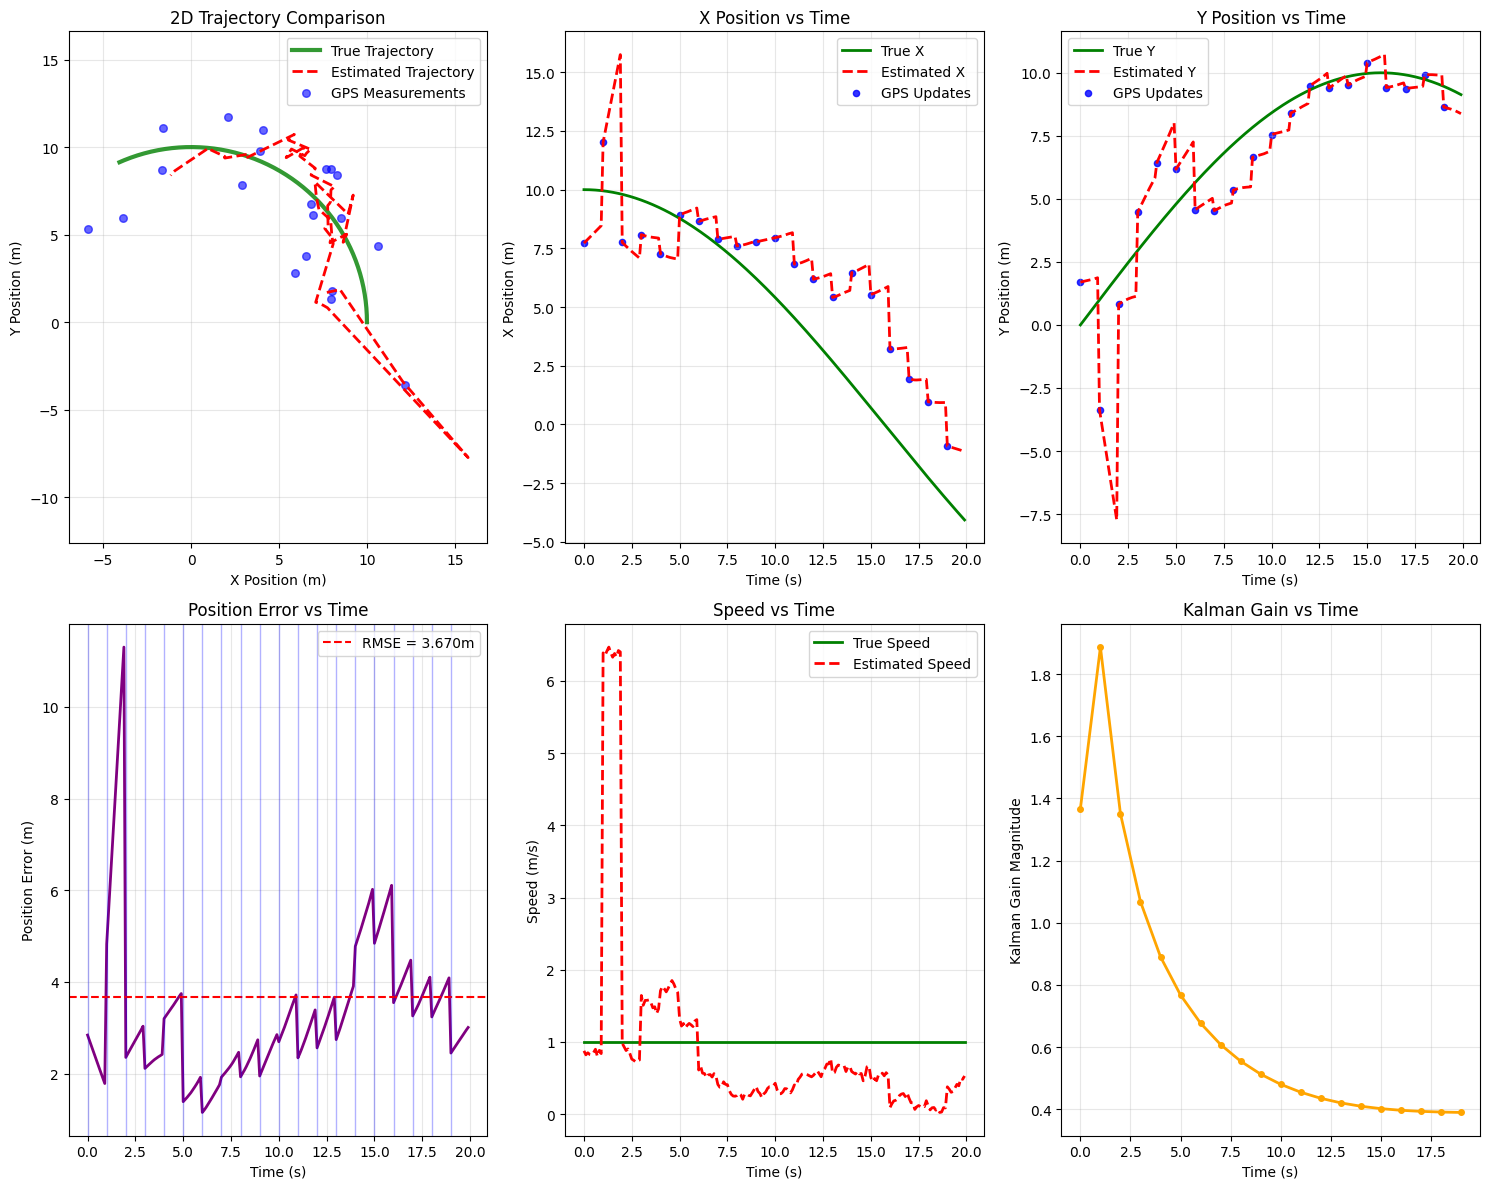


상세 분석 및 결론

📊 정량적 성능 분석:
지표                   값               설명
-------------------------------------------------------
위치 RMSE              3.670   m     평균 위치 오차
속도 RMSE              1.926   m/s   평균 속도 오차
최대 위치 오차             11.303  m     최악 경우 위치 오차
GPS 단독 RMSE          3.382   m     GPS만 사용 시 오차
개선율                  -8.5    %     센서 융합으로 인한 개선

🔍 센서 융합의 핵심 원리:
1. 🎯 예측 단계 (Predict):
   • IMU 가속도로 위치와 속도 예측
   • 운동 방정식 사용: x = x₀ + v₀t + ½at²
   • 불확실성도 함께 전파

2. 📡 업데이트 단계 (Update):
   • GPS 측정값으로 예측 보정
   • 칼만 게인으로 신뢰도 결정
   • 높은 게인 = GPS 더 신뢰, 낮은 게인 = 예측 더 신뢰

💡 센서별 특성 활용:
• GPS (1Hz): 절대 위치 제공, 드리프트 없음
• IMU (10Hz): 빠른 업데이트, 단기 정확도 우수
• 융합 효과: GPS의 정확도 + IMU의 반응성

🚀 실제 자율주행 적용:
• 터널/실내: IMU로 연속 추정
• 개활지: GPS로 드리프트 보정
• 급정거/급회전: IMU로 빠른 대응
• 센서 고장: 다른 센서로 백업

📈 성능 개선 방향:
⚠️  추가 튜닝 필요 - 노이즈 모델이나 게인 조정

🎓 학습 포인트:
1. 칼만 필터는 '최적' 추정기 (선형 시스템, 가우시안 노이즈)
2. 센서 융합 = 각 센서의 장점 극대화
3. 실시간 처리 가능 (과거 데이터 불필요)
4. 불확실성 정량화 (신뢰구간 제공)

시뮬레이션 완료! 🎉


In [6]:
"""
GPS + IMU 센서 융합 시뮬레이션
=================================

이 코드는 GPS와 IMU 센서를 칼만 필터로 융합하여
정확한 위치와 속도를 추정하는 방법을 보여줍니다.

시스템 모델:
- 상태: [x, y, vx, vy] (위치 x,y와 속도 vx,vy)
- GPS: 위치 측정 (느리지만 정확)
- IMU: 가속도 측정 (빠르지만 드리프트)
"""

import numpy as np
import matplotlib.pyplot as plt
import random
import math

# ================================================================
# 1. 시스템 설정 및 초기화
# ================================================================

print("="*70)
print("GPS + IMU 센서 융합 시뮬레이션")
print("="*70)

# 시뮬레이션 매개변수 설정
dt = 0.1  # 시간 간격 (초) - IMU는 10Hz로 업데이트
gps_update_rate = 10  # GPS는 IMU 10번 중 1번만 업데이트 (1Hz)
total_time = 20  # 총 시뮬레이션 시간 (초)
steps = int(total_time / dt)  # 총 시뮬레이션 스텝 수

print(f"시뮬레이션 설정:")
print(f"  - 시간 간격 (dt): {dt}초")
print(f"  - IMU 업데이트: {1/dt}Hz")
print(f"  - GPS 업데이트: {1/(dt*gps_update_rate)}Hz")
print(f"  - 총 시뮬레이션 시간: {total_time}초")
print(f"  - 총 스텝 수: {steps}")

# ================================================================
# 2. 진실 궤적 생성 (Ground Truth)
# ================================================================

print(f"\n[Step 1] 진실 궤적 생성")
print("-" * 30)

# 원형 궤적을 따라 움직이는 객체 시뮬레이션
radius = 10.0  # 원의 반지름 (미터)
angular_velocity = 0.1  # 각속도 (rad/s)

# 진실값 저장 배열
true_positions = []  # 실제 위치 [x, y]
true_velocities = []  # 실제 속도 [vx, vy]
true_accelerations = []  # 실제 가속도 [ax, ay]

print("원형 궤적 생성 중...")
for i in range(steps):
    t = i * dt  # 현재 시간

    # 원형 운동: x = r*cos(ωt), y = r*sin(ωt)
    x = radius * math.cos(angular_velocity * t)
    y = radius * math.sin(angular_velocity * t)

    # 속도: vx = -rω*sin(ωt), vy = rω*cos(ωt)
    vx = -radius * angular_velocity * math.sin(angular_velocity * t)
    vy = radius * angular_velocity * math.cos(angular_velocity * t)

    # 가속도: ax = -rω²*cos(ωt), ay = -rω²*sin(ωt)
    ax = -radius * angular_velocity**2 * math.cos(angular_velocity * t)
    ay = -radius * angular_velocity**2 * math.sin(angular_velocity * t)

    true_positions.append([x, y])
    true_velocities.append([vx, vy])
    true_accelerations.append([ax, ay])

print(f"진실 궤적 생성 완료 - {len(true_positions)}개 포인트")

# ================================================================
# 3. 센서 데이터 시뮬레이션
# ================================================================

print(f"\n[Step 2] 센서 데이터 시뮬레이션")
print("-" * 35)

# GPS 센서 특성
gps_position_noise = 2.0  # GPS 위치 노이즈 표준편차 (미터)
print(f"GPS 설정:")
print(f"  - 위치 노이즈: ±{gps_position_noise}m (표준편차)")
print(f"  - 업데이트 주기: {dt*gps_update_rate}초")

# IMU 센서 특성
imu_acceleration_noise = 0.5  # IMU 가속도 노이즈 표준편차 (m/s²)
imu_bias = [0.1, -0.05]  # IMU 바이어스 (일정한 오차)
print(f"IMU 설정:")
print(f"  - 가속도 노이즈: ±{imu_acceleration_noise}m/s² (표준편차)")
print(f"  - 바이어스: x={imu_bias[0]}, y={imu_bias[1]} m/s²")
print(f"  - 업데이트 주기: {dt}초")

# 센서 데이터 저장 배열
gps_measurements = []  # GPS 측정값
imu_measurements = []  # IMU 측정값
measurement_times = []  # 측정 시간

print("\n센서 데이터 생성 중...")
for i in range(steps):
    t = i * dt

    # IMU 데이터 (매 스텝마다 업데이트)
    # 실제 가속도에 노이즈와 바이어스 추가
    true_acc = true_accelerations[i]
    noisy_acc_x = true_acc[0] + random.gauss(0, imu_acceleration_noise) + imu_bias[0]
    noisy_acc_y = true_acc[1] + random.gauss(0, imu_acceleration_noise) + imu_bias[1]
    imu_measurements.append([noisy_acc_x, noisy_acc_y])

    # GPS 데이터 (GPS 업데이트 주기에 따라)
    if i % gps_update_rate == 0:
        # 실제 위치에 노이즈 추가
        true_pos = true_positions[i]
        noisy_pos_x = true_pos[0] + random.gauss(0, gps_position_noise)
        noisy_pos_y = true_pos[1] + random.gauss(0, gps_position_noise)
        gps_measurements.append([noisy_pos_x, noisy_pos_y])
        measurement_times.append(i)
    else:
        gps_measurements.append(None)  # GPS 데이터 없음

print(f"센서 데이터 생성 완료:")
print(f"  - IMU 데이터: {len(imu_measurements)}개")
print(f"  - GPS 데이터: {len([x for x in gps_measurements if x is not None])}개")

# ================================================================
# 4. 칼만 필터 설계
# ================================================================

print(f"\n[Step 3] 칼만 필터 설계")
print("-" * 30)

class GPSIMUKalmanFilter:
    """
    GPS + IMU 센서 융합을 위한 칼만 필터

    상태 벡터: [x, y, vx, vy]
    - x, y: 위치 (미터)
    - vx, vy: 속도 (m/s)
    """

    def __init__(self, dt):
        """
        칼만 필터 초기화

        Args:
            dt: 시간 간격 (초)
        """
        self.dt = dt

        # 상태 벡터 [x, y, vx, vy]
        self.state = np.array([0.0, 0.0, 0.0, 0.0])

        # 상태 공분산 행렬 (초기 불확실성)
        self.P = np.eye(4) * 100  # 초기에는 매우 불확실

        # 상태 전이 행렬 (운동 방정식)
        # x(k+1) = x(k) + vx(k)*dt
        # y(k+1) = y(k) + vy(k)*dt
        # vx(k+1) = vx(k) + ax*dt
        # vy(k+1) = vy(k) + ay*dt
        self.F = np.array([
            [1, 0, dt, 0 ],   # x(k+1) = x(k) + vx*dt
            [0, 1, 0 , dt],   # y(k+1) = y(k) + vy*dt
            [0, 0, 1 , 0 ],   # vx(k+1) = vx(k) + ax*dt
            [0, 0, 0 , 1 ]    # vy(k+1) = vy(k) + ay*dt
        ])

        # 제어 입력 행렬 (가속도 입력)
        self.B = np.array([
            [0.5*dt**2, 0],       # x에 대한 가속도 영향
            [0, 0.5*dt**2],       # y에 대한 가속도 영향
            [dt, 0],              # vx에 대한 가속도 영향
            [0, dt]               # vy에 대한 가속도 영향
        ])

        # GPS 측정 행렬 (위치만 측정)
        self.H_gps = np.array([
            [1, 0, 0, 0],  # x 위치 측정
            [0, 1, 0, 0]   # y 위치 측정
        ])

        # 프로세스 노이즈 공분산 (모델 불확실성)
        process_noise = 0.1
        self.Q = np.array([
            [dt**4/4, 0, dt**3/2, 0],
            [0, dt**4/4, 0, dt**3/2],
            [dt**3/2, 0, dt**2, 0],
            [0, dt**3/2, 0, dt**2]
        ]) * process_noise

        # GPS 측정 노이즈 공분산
        gps_noise = gps_position_noise**2
        self.R_gps = np.array([
            [gps_noise, 0],
            [0, gps_noise]
        ])

        print("칼만 필터 초기화 완료:")
        print(f"  - 상태 벡터: [x, y, vx, vy]")
        print(f"  - 상태 차원: {len(self.state)}")
        print(f"  - GPS 측정 차원: {self.H_gps.shape[0]}")

    def predict(self, acceleration):
        """
        예측 단계: IMU 가속도를 사용하여 상태 예측

        Args:
            acceleration: [ax, ay] IMU 가속도 측정값
        """
        # 상태 예측: x(k|k-1) = F * x(k-1|k-1) + B * u(k)
        self.state = self.F @ self.state + self.B @ acceleration

        # 공분산 예측: P(k|k-1) = F * P(k-1|k-1) * F^T + Q
        self.P = self.F @ self.P @ self.F.T + self.Q

    def update_gps(self, gps_position):
        """
        GPS 업데이트 단계: GPS 위치 측정값으로 상태 보정

        Args:
            gps_position: [x, y] GPS 위치 측정값
        """
        # 측정 잔차: y = z - H * x(k|k-1)
        z = np.array(gps_position)
        y = z - self.H_gps @ self.state

        # 잔차 공분산: S = H * P(k|k-1) * H^T + R
        S = self.H_gps @ self.P @ self.H_gps.T + self.R_gps

        # 칼만 게인: K = P(k|k-1) * H^T * S^(-1)
        K = self.P @ self.H_gps.T @ np.linalg.inv(S)

        # 상태 업데이트: x(k|k) = x(k|k-1) + K * y
        self.state = self.state + K @ y

        # 공분산 업데이트: P(k|k) = (I - K * H) * P(k|k-1)
        I = np.eye(len(self.state))
        self.P = (I - K @ self.H_gps) @ self.P

        return K  # 칼만 게인 반환 (분석용)

# ================================================================
# 5. 센서 융합 실행
# ================================================================

print(f"\n[Step 4] 센서 융합 실행")
print("-" * 25)

# 칼만 필터 초기화
kf = GPSIMUKalmanFilter(dt)

# 결과 저장
estimated_states = []  # 추정된 상태
kalman_gains = []      # 칼만 게인 (GPS 업데이트 시에만)
gps_update_indices = []  # GPS 업데이트된 인덱스

print("센서 융합 진행 중...")
print("단계별 진행 상황:")
print("Step | GPS Update | Position Error | Velocity Error")
print("-" * 55)

for i in range(steps):
    # 1. 예측 단계 (IMU 가속도 사용)
    imu_acc = imu_measurements[i]
    kf.predict(imu_acc)

    # 2. GPS 업데이트 (GPS 데이터가 있을 때만)
    gps_updated = False
    if gps_measurements[i] is not None:
        K = kf.update_gps(gps_measurements[i])
        kalman_gains.append(np.linalg.norm(K))  # 게인 크기
        gps_update_indices.append(i)
        gps_updated = True

    # 3. 현재 상태 저장
    estimated_states.append(kf.state.copy())

    # 진행 상황 출력 (일부만)
    if i % 20 == 0 or gps_updated:
        true_pos = true_positions[i]
        est_pos = kf.state[:2]
        true_vel = true_velocities[i]
        est_vel = kf.state[2:]

        pos_error = np.linalg.norm(est_pos - true_pos)
        vel_error = np.linalg.norm(est_vel - true_vel)

        gps_status = "YES" if gps_updated else "NO"
        print(f"{i:4d} | {gps_status:10s} | {pos_error:8.3f}m     | {vel_error:8.3f}m/s")

print(f"\n센서 융합 완료!")
print(f"  - 총 처리 스텝: {len(estimated_states)}")
print(f"  - GPS 업데이트 횟수: {len(kalman_gains)}")

# ================================================================
# 6. 결과 분석 및 시각화
# ================================================================

print(f"\n[Step 5] 결과 분석 및 시각화")
print("-" * 35)

# numpy 배열로 변환 (계산 편의성)
true_positions = np.array(true_positions)
estimated_states = np.array(estimated_states)
estimated_positions = estimated_states[:, :2]  # 위치만 추출
estimated_velocities = estimated_states[:, 2:]  # 속도만 추출

# 성능 지표 계산
position_errors = np.linalg.norm(estimated_positions - true_positions, axis=1)
velocity_errors = np.linalg.norm(estimated_velocities - true_velocities, axis=1)

rmse_position = np.sqrt(np.mean(position_errors**2))
rmse_velocity = np.sqrt(np.mean(velocity_errors**2))
max_position_error = np.max(position_errors)
max_velocity_error = np.max(velocity_errors)

print("성능 분석 결과:")
print(f"  위치 RMSE: {rmse_position:.3f}m")
print(f"  속도 RMSE: {rmse_velocity:.3f}m/s")
print(f"  최대 위치 오차: {max_position_error:.3f}m")
print(f"  최대 속도 오차: {max_velocity_error:.3f}m/s")

# GPS만 사용했을 때와 비교
gps_only_errors = []
for i, gps_meas in enumerate(gps_measurements):
    if gps_meas is not None:
        true_pos = true_positions[i]
        gps_error = np.linalg.norm(gps_meas - true_pos)
        gps_only_errors.append(gps_error)

gps_rmse = np.sqrt(np.mean(np.array(gps_only_errors)**2))
print(f"  GPS만 사용 시 RMSE: {gps_rmse:.3f}m")
print(f"  센서 융합 개선율: {((gps_rmse - rmse_position) / gps_rmse * 100):.1f}%")

# ================================================================
# 7. 시각화
# ================================================================

print(f"\n그래프 생성 중...")

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = ['Arial', 'DejaVu Sans']

# 전체 그래프 설정
fig = plt.figure(figsize=(15, 12))

# 1. 궤적 비교 (2D)
plt.subplot(2, 3, 1)
plt.plot(true_positions[:, 0], true_positions[:, 1], 'g-',
         linewidth=3, label='True Trajectory', alpha=0.8)
plt.plot(estimated_positions[:, 0], estimated_positions[:, 1], 'r--',
         linewidth=2, label='Estimated Trajectory')

# GPS 측정점 표시
gps_x = [gps_measurements[i][0] for i in range(len(gps_measurements)) if gps_measurements[i] is not None]
gps_y = [gps_measurements[i][1] for i in range(len(gps_measurements)) if gps_measurements[i] is not None]
plt.scatter(gps_x, gps_y, c='blue', s=30, alpha=0.6, label='GPS Measurements')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('2D Trajectory Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# 2. X 위치 시간 변화
plt.subplot(2, 3, 2)
time_axis = np.arange(steps) * dt
plt.plot(time_axis, true_positions[:, 0], 'g-', linewidth=2, label='True X')
plt.plot(time_axis, estimated_positions[:, 0], 'r--', linewidth=2, label='Estimated X')

# GPS 업데이트 시점 표시
gps_times = [i * dt for i in gps_update_indices]
gps_x_values = [estimated_positions[i, 0] for i in gps_update_indices]
plt.scatter(gps_times, gps_x_values, c='blue', s=20, alpha=0.8, label='GPS Updates')

plt.xlabel('Time (s)')
plt.ylabel('X Position (m)')
plt.title('X Position vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Y 위치 시간 변화
plt.subplot(2, 3, 3)
plt.plot(time_axis, true_positions[:, 1], 'g-', linewidth=2, label='True Y')
plt.plot(time_axis, estimated_positions[:, 1], 'r--', linewidth=2, label='Estimated Y')

gps_y_values = [estimated_positions[i, 1] for i in gps_update_indices]
plt.scatter(gps_times, gps_y_values, c='blue', s=20, alpha=0.8, label='GPS Updates')

plt.xlabel('Time (s)')
plt.ylabel('Y Position (m)')
plt.title('Y Position vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. 위치 오차 시간 변화
plt.subplot(2, 3, 4)
plt.plot(time_axis, position_errors, 'purple', linewidth=2)
plt.axhline(y=rmse_position, color='red', linestyle='--',
           label=f'RMSE = {rmse_position:.3f}m')

# GPS 업데이트 시점을 수직선으로 표시
for gps_time in gps_times:
    plt.axvline(x=gps_time, color='blue', alpha=0.3, linewidth=1)

plt.xlabel('Time (s)')
plt.ylabel('Position Error (m)')
plt.title('Position Error vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. 속도 비교 (크기)
plt.subplot(2, 3, 5)
true_speed = np.linalg.norm(true_velocities, axis=1)
estimated_speed = np.linalg.norm(estimated_velocities, axis=1)

plt.plot(time_axis, true_speed, 'g-', linewidth=2, label='True Speed')
plt.plot(time_axis, estimated_speed, 'r--', linewidth=2, label='Estimated Speed')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Speed vs Time')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. 칼만 게인 변화
plt.subplot(2, 3, 6)
if kalman_gains:
    plt.plot(gps_times, kalman_gains, 'orange', marker='o', linewidth=2, markersize=4)
    plt.xlabel('Time (s)')
    plt.ylabel('Kalman Gain Magnitude')
    plt.title('Kalman Gain vs Time')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
print("그래프가 표시됩니다.")
plt.show()

# ================================================================
# 8. 상세 분석 및 결론
# ================================================================

print(f"\n" + "="*70)
print("상세 분석 및 결론")
print("="*70)

print(f"\n📊 정량적 성능 분석:")
print(f"{'지표':<20} {'값':<15} {'설명'}")
print("-" * 55)
print(f"{'위치 RMSE':<20} {rmse_position:<8.3f}m     {'평균 위치 오차'}")
print(f"{'속도 RMSE':<20} {rmse_velocity:<8.3f}m/s   {'평균 속도 오차'}")
print(f"{'최대 위치 오차':<20} {max_position_error:<8.3f}m     {'최악 경우 위치 오차'}")
print(f"{'GPS 단독 RMSE':<20} {gps_rmse:<8.3f}m     {'GPS만 사용 시 오차'}")
print(f"{'개선율':<20} {((gps_rmse - rmse_position) / gps_rmse * 100):<8.1f}%     {'센서 융합으로 인한 개선'}")

print(f"\n🔍 센서 융합의 핵심 원리:")
print("1. 🎯 예측 단계 (Predict):")
print("   • IMU 가속도로 위치와 속도 예측")
print("   • 운동 방정식 사용: x = x₀ + v₀t + ½at²")
print("   • 불확실성도 함께 전파")

print("\n2. 📡 업데이트 단계 (Update):")
print("   • GPS 측정값으로 예측 보정")
print("   • 칼만 게인으로 신뢰도 결정")
print("   • 높은 게인 = GPS 더 신뢰, 낮은 게인 = 예측 더 신뢰")

print(f"\n💡 센서별 특성 활용:")
print("• GPS (1Hz): 절대 위치 제공, 드리프트 없음")
print("• IMU (10Hz): 빠른 업데이트, 단기 정확도 우수")
print("• 융합 효과: GPS의 정확도 + IMU의 반응성")

print(f"\n🚀 실제 자율주행 적용:")
print("• 터널/실내: IMU로 연속 추정")
print("• 개활지: GPS로 드리프트 보정")
print("• 급정거/급회전: IMU로 빠른 대응")
print("• 센서 고장: 다른 센서로 백업")

print(f"\n📈 성능 개선 방향:")
if rmse_position < gps_rmse:
    print(f"✅ 센서 융합이 GPS 단독보다 {((gps_rmse - rmse_position) / gps_rmse * 100):.1f}% 개선됨")
else:
    print(f"⚠️  추가 튜닝 필요 - 노이즈 모델이나 게인 조정")

print(f"\n🎓 학습 포인트:")
print("1. 칼만 필터는 '최적' 추정기 (선형 시스템, 가우시안 노이즈)")
print("2. 센서 융합 = 각 센서의 장점 극대화")
print("3. 실시간 처리 가능 (과거 데이터 불필요)")
print("4. 불확실성 정량화 (신뢰구간 제공)")

print(f"\n" + "="*70)
print("시뮬레이션 완료! 🎉")
print("="*70)